In [1]:
import pandas as pd

In [17]:
data =("Project Sample/IRIS.csv") #loading the data
df=pd.read_csv(data)

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## DATA CLEANING

In [21]:
df.duplicated() #data cleaning by checking for duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [27]:
df[df.duplicated()] #to check all the colums and rows that have null values

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [33]:
df.drop_duplicates(inplace=True)

## FEATURE ENGINEERING/ PREPROCESSING

In [36]:
#match species to numeric type
df['species']=df['species']. astype('category').cat.codes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [40]:
df[df.isnull()]

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN


## CHECKING THE DATA USING HIST/PAIR PLOT

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

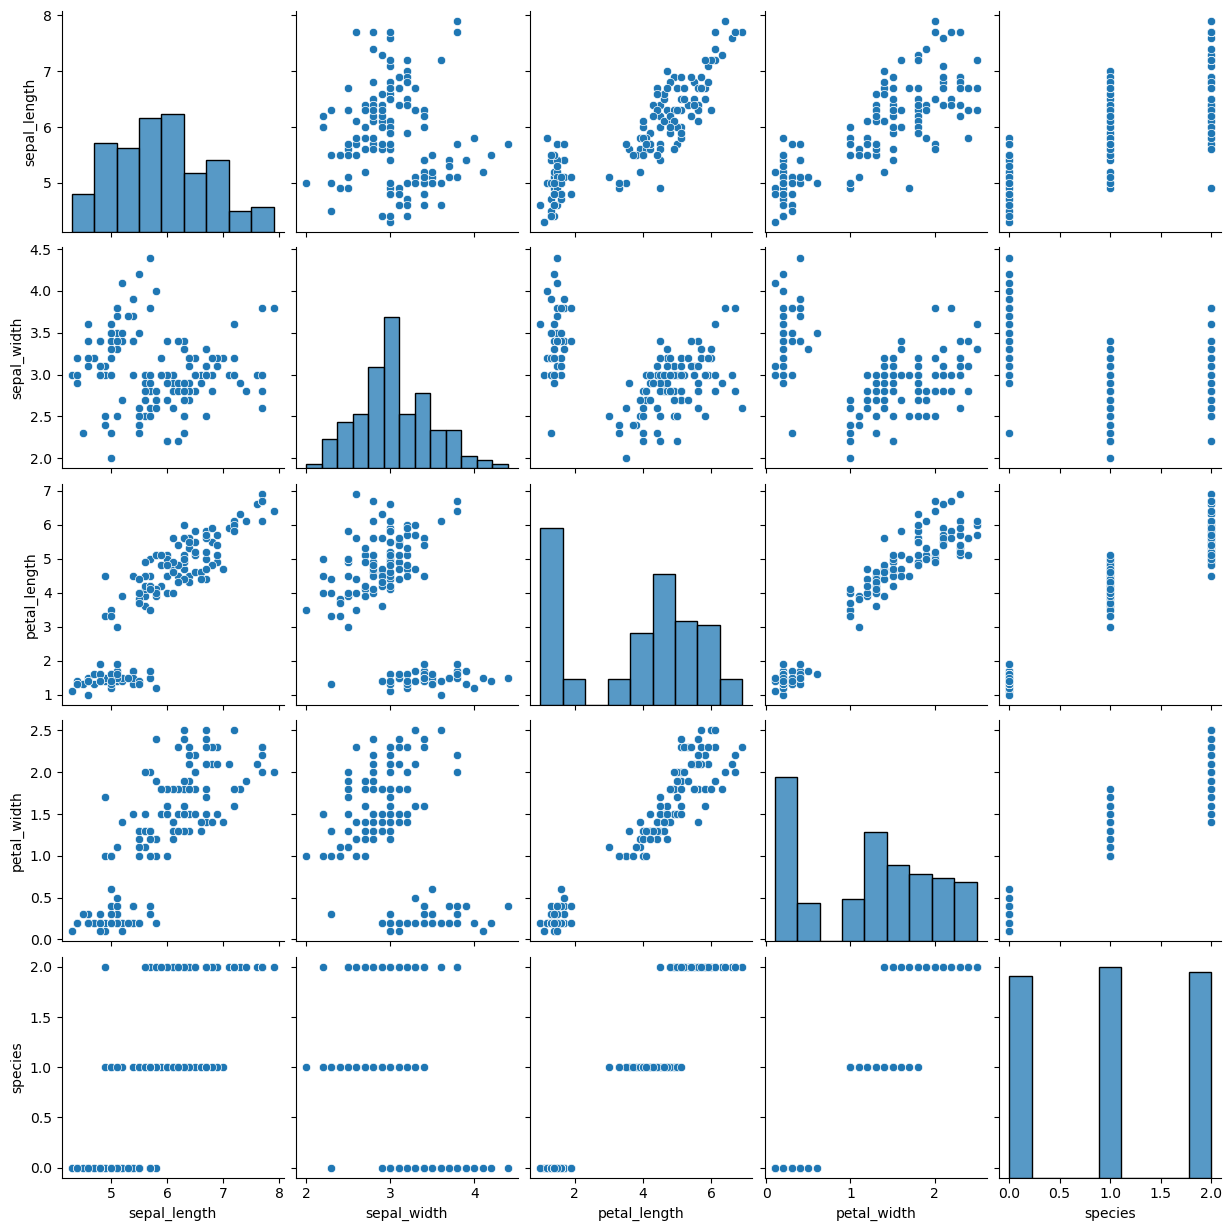

In [56]:
sns.pairplot(df)

In [58]:
corr= df.corr() #finding the correlation
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


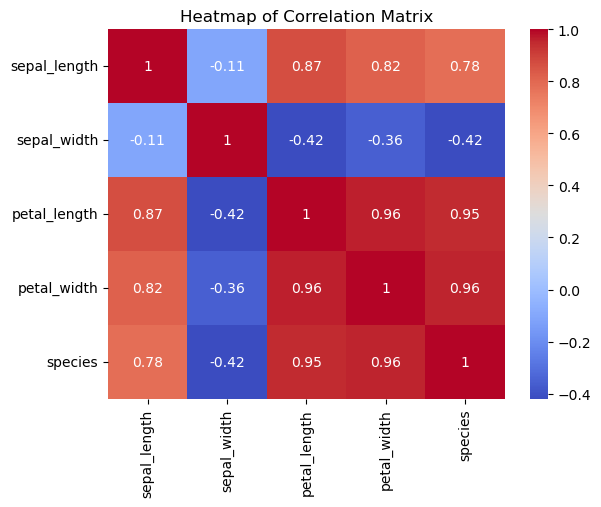

In [68]:
sns.heatmap(corr, annot=True, cmap='coolwarm') #finding heat map
plt.title('Heatmap of Correlation Matrix')
plt.show()

## SPLITTING BETWEEN TEST SAMPLE AND TRAINING SAMPLE

In [71]:
from sklearn.model_selection import train_test_split

#features and target variable
x=df.drop('species', axis=1)
y=df['species']

#split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
"""
train_test_split: This function from sklearn.model_selection is used to split arrays or matrices into random train and test subsets
test_size=0.3: This parameter specifies the proportion of the dataset to include in the test split. Here, 0.3 means 30% of the data will be used for testing, and the remaining 70% will be used for training.
random_state=42: This parameter sets the seed for the random number generator used by the function. Setting a random state ensures that the split is reproducible; that is, the same split will occur each time you run the code with that specific seed.
x_train and y_train contain the training data.
x_test and y_test contain the testing data.
The split ensures that the data is divided into training and test sets in a reproducible way, allowing you to train and evaluate your model effectively.
"""